In [36]:
import pandas as pd
import numpy as np
import pymc3 as pm
import scipy
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from scipy.stats import percentileofscore
from scipy import stats
import matplotlib
import seaborn as sns
from IPython.core.pylabtools import figsize
pd.set_option('display.max_columns', 500) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 500)


df = pd.read_csv('C:/Python Projects/student-mat.csv') #../input/student-mat.csv
df.head()
df.shape


(395, 33)

In [37]:

#Rename of the G3 column
df = df.rename(columns={'G3': 'Final_Grade'})
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [38]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


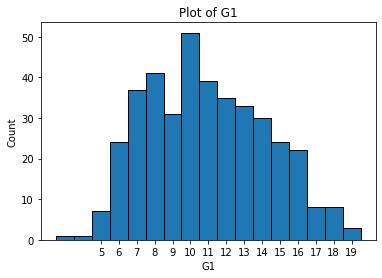

In [39]:
plt.bar(df['G1'].value_counts().index, 
        df['G1'].value_counts().values, edgecolor = 'k', width = 1)
plt.xlabel('G1'); plt.ylabel('Count'); plt.title('Plot of G1');
plt.xticks(list(range(5, 20)));

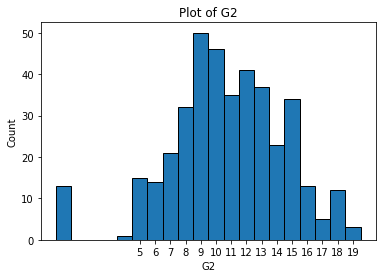

In [40]:
plt.bar(df['G2'].value_counts().index, 
        df['G2'].value_counts().values, edgecolor = 'k', width = 1)
plt.xlabel('G2'); plt.ylabel('Count'); plt.title('Plot of G2');
plt.xticks(list(range(5, 20)));

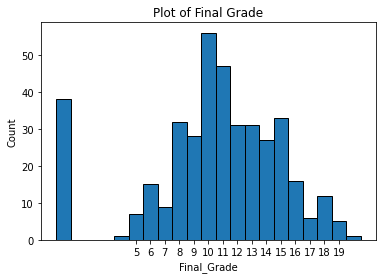

In [41]:
plt.bar(df['Final_Grade'].value_counts().index, 
        df['Final_Grade'].value_counts().values, edgecolor = 'k', width = 1)
plt.xlabel('Final_Grade'); plt.ylabel('Count'); plt.title('Plot of Final Grade');
plt.xticks(list(range(5, 20)));

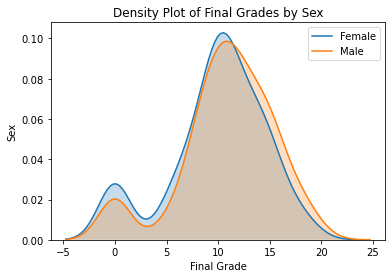

In [42]:
sns.kdeplot(df.loc[df['sex'] == 'F', 'Final_Grade'], label = 'Female', shade = True)
sns.kdeplot(df.loc[df['sex'] == 'M', 'Final_Grade'], label = 'Male', shade = True)
plt.xlabel('Final Grade'); plt.ylabel('Sex'); plt.title('Density Plot of Final Grades by Sex');

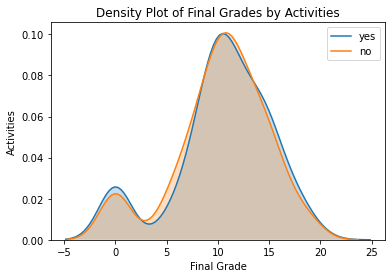

In [43]:
sns.kdeplot(df.loc[df['activities'] == 'yes', 'Final_Grade'], label = 'yes', shade = True)
sns.kdeplot(df.loc[df['activities'] == 'no', 'Final_Grade'], label = 'no', shade = True)
plt.xlabel('Final Grade'); plt.ylabel('Activities'); plt.title('Density Plot of Final Grades by Activities');

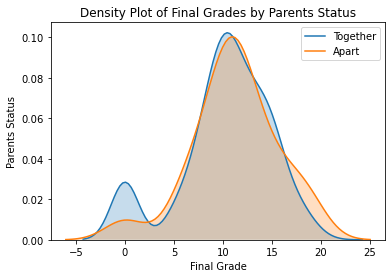

In [44]:
sns.kdeplot(df.loc[df['Pstatus'] == 'T', 'Final_Grade'], label = 'Together', shade = True)
sns.kdeplot(df.loc[df['Pstatus'] == 'A', 'Final_Grade'], label = 'Apart', shade = True)
plt.xlabel('Final Grade'); plt.ylabel('Parents Status'); plt.title('Density Plot of Final Grades by Parents Status');

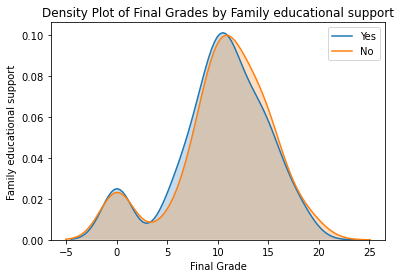

In [45]:
sns.kdeplot(df.loc[df['famsup'] == 'yes', 'Final_Grade'], label = 'Yes', shade = True)
sns.kdeplot(df.loc[df['famsup'] == 'no', 'Final_Grade'], label = 'No', shade = True)
plt.xlabel('Final Grade'); plt.ylabel('Family educational support'); plt.title('Density Plot of Final Grades by Family educational support');

In [46]:
numerical_values = df.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_values

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'Final_Grade'], dtype=object)

In [47]:
categorical_values = (df.select_dtypes(include=['object']).columns.values)
categorical_values

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [48]:
df.corr()['Final_Grade'].sort_values()

failures      -0.360415
age           -0.161579
goout         -0.132791
traveltime    -0.117142
health        -0.061335
Dalc          -0.054660
Walc          -0.051939
freetime       0.011307
absences       0.034247
famrel         0.051363
studytime      0.097820
Fedu           0.152457
Medu           0.217147
G1             0.801468
G2             0.904868
Final_Grade    1.000000
Name: Final_Grade, dtype: float64

In [49]:
#correlation in more details
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
school,1.000000,-0.012286,-0.158646,0.279797,0.064866,0.045923,-0.047448,-0.022447,-0.056670,0.073473,-0.130047,0.075705,-0.065011,-0.011336,0.088290,0.139789,-0.164967,-0.017083,-0.116946,0.089277,0.024150,-0.133578,0.060700,0.071364,0.069432,-0.061419,0.151927,0.036914,-0.053526,0.038333,-0.018273,-0.051720,-0.006172
sex,-0.012286,1.000000,0.040769,0.028504,0.089862,0.023443,-0.090204,0.024681,0.191421,-0.098553,-0.079885,-0.015285,0.026242,0.157135,0.040288,0.138271,-0.151623,-0.129126,0.099833,0.008203,0.151056,0.044113,-0.102023,0.009442,0.178889,0.051665,0.263480,0.260517,-0.042053,0.052416,0.042817,0.013856,0.039674
age,-0.158646,0.040769,1.000000,-0.142727,-0.072103,-0.052484,0.015300,0.053283,0.052072,0.035762,0.038458,0.294619,0.082460,0.038018,0.127548,-0.106558,0.020245,-0.064547,0.033769,0.059200,-0.047640,-0.056778,-0.081054,0.034229,0.090249,0.009976,0.012053,-0.081418,-0.066909,-0.088300,0.000662,0.052939,0.012219
address,0.279797,0.028504,-0.142727,1.000000,-0.072472,0.042572,0.061184,-0.070924,-0.108818,-0.045578,-0.018625,-0.070318,0.050789,0.088022,0.095578,0.024712,-0.023903,-0.052800,0.051360,0.059589,0.042854,-0.216842,-0.005257,0.026820,0.051967,0.089096,0.117053,0.095709,-0.027870,0.079534,0.042975,-0.016938,0.055653
famsize,0.064866,0.089862,-0.072103,-0.072472,1.000000,-0.149612,-0.026716,-0.014572,0.071386,0.066836,-0.014619,-0.030443,-0.057741,-0.048122,0.012163,0.028642,-0.112893,-0.013882,-0.000113,-0.102088,0.005806,0.000720,0.034395,0.018087,0.019341,-0.048853,0.149475,0.079659,-0.001691,0.082394,0.043880,0.015283,-0.049692
Pstatus,0.045923,0.023443,-0.052484,0.042572,-0.149612,1.000000,0.013616,0.068956,-0.054476,0.013789,-0.019839,0.026053,0.012673,0.073189,0.021884,0.042238,0.019067,0.046435,0.097352,0.090615,0.040735,0.070074,-0.040451,-0.061648,-0.012452,0.046173,-0.046631,-0.009950,-0.033922,-0.121606,-0.072069,-0.081631,0.048856
Medu,-0.047448,-0.090204,0.015300,0.061184,-0.026716,0.013616,1.000000,0.206609,-0.258174,0.080916,-0.028121,0.094322,0.011824,0.022694,0.108078,-0.045766,-0.098782,-0.091312,-0.087950,0.074623,0.111412,-0.069320,-0.022747,-0.046076,-0.020306,0.044637,-0.052813,-0.007425,-0.018058,-0.006820,-0.053236,0.031924,0.022161
Fedu,-0.022447,0.024681,0.053283,-0.070924,-0.014572,0.068956,0.206609,1.000000,-0.036981,0.085047,0.065609,0.032988,-0.062932,-0.012810,0.010903,-0.013070,-0.050067,0.031130,-0.002220,0.010362,-0.014279,0.033719,0.003861,-0.034870,-0.025949,0.057789,-0.093715,-0.063447,-0.009697,-0.002740,0.014658,-0.006052,-0.052642
Mjob,-0.056670,0.191421,0.052072,-0.108818,0.071386,-0.054476,-0.258174,-0.036981,1.000000,-0.056233,0.042798,-0.075506,-0.045082,0.025660,-0.051148,0.040958,0.050667,0.096566,0.098754,-0.095848,-0.097887,0.216969,-0.062999,-0.033579,0.081143,0.029920,0.056574,0.012256,0.064876,0.070313,0.007835,0.085617,0.016174
Fjob,0.073473,-0.098553,0.035762,-0.045578,0.066836,0.013789,0.080916,0.085047,-0.056233,1.000000,0.026856,0.097343,0.044547,0.021260,0.108553,-0.017146,0.005538,0.031086,0.036609,-0.074115,0.025829,0.051496,0.045406,0.009854,-0.050772,-0.006843,0.051442,-0.033347,0.014462,0.057946,0.043417,-0.004935,0.025347


In [50]:
# Select categorical values
category_df = df.select_dtypes('object')
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Final_Grade'] = df['Final_Grade']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Final_Grade
0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,10


In [51]:

# Correlations in one-hot encoded dataframe
dummy_df.corr()['Final_Grade'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [52]:

def format_data(df):
    # Targets are final grade of student
    labels = df['Final_Grade']
    
    # Drops school and grades from features
    df = df.drop(columns=['school', 'G1', 'G2'])
    df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['Final_Grade'].sort_values(ascending=False)
    
    # top 5 most correlation features with Final Grade
    most_correlated = most_correlated[:7]
    
    df = df.loc[:, most_correlated.index]
    df = df.drop(columns = 'higher_no')
    
    #training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
    test_size = 0.25,
    random_state=42)
    
    return X_train, X_test, y_train, y_test
    

In [53]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,Final_Grade,failures,Medu,higher_yes,age,Fedu
16,14,0,4,1,16,4
66,12,0,4,1,15,4
211,13,0,4,1,17,4
7,6,0,4,1,17,4
19,10,0,4,1,16,3


In [54]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse
    

In [55]:
# Evaluate several machine learning models
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 
                      'Random Forest', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Final_Grade')
    X_test = X_test.drop(columns='Final_Grade')
    
    #the models
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=50)
    model3 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model4 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict
    for i, model in enumerate([model1, model2, model3, model4]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [56]:
results = evaluate(X_train, X_test, y_train, y_test)

In [57]:
results

,mae,rmse
Linear Regression,3.60327,4.51021
Random Forest,3.79649,4.68212
SVM,3.53945,4.50556
Gradient Boosted,3.55136,4.39824
Baseline,3.78788,4.82523


In [58]:
# Formula for Bayesian Linear Regression 
formula = 'Final_Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Final_Grade ~ failures + Medu + higher_yes + age + Fedu'

In [62]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=1000, chains = 2, tune = 250, cores=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, Fedu, age, higher_yes, Medu, failures, Intercept]


Sampling 1 chain for 7 tune and 0 draw iterations (7 + 0 draws total) took 6 seconds.
No posterior samples. Unable to run convergence checks


In [60]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.ix[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.ix[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.ix['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

In [61]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test, results)


NameError: name 'normal_trace' is not defined